<a href="https://colab.research.google.com/github/pyjanvi/Clustering-customer-review-for-market-Research/blob/main/Clustering_customer_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')
from sklearn.metrics import silhouette_score


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [5]:
%pip install nltk

In [6]:
import pandas as pd
customer_data = pd.read_excel('amazon.xlsx')
customer_data

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,â‚¹399,"â‚¹1,099",0.64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,â‚¹199,â‚¹349,0.43,4,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,â‚¹199,"â‚¹1,899",0.90,3.9,7928.0,ã€ Fast Charger& Data Syncã€‘-With built-in s...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,â‚¹329,â‚¹699,0.53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,â‚¹154,â‚¹399,0.61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,â‚¹379,â‚¹919,0.59,4,1090.0,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"â‚¹2,280","â‚¹3,045",0.25,4.1,4118.0,"230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everythi

In [7]:
customer_data.shape
customer_data.columns
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   object 
 4   actual_price         1465 non-null   object 
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   object 
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [8]:
#drop columns
customer_data = customer_data.drop(['discounted_price','product_id','actual_price','discount_percentage','user_id','rating_count','product_link','img_link','review_title'],axis= 1, errors='ignore')
customer_data

,product_name,category,rating,about_product,user_name,review_id,review_content
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,4.2,High Compatibility : Compatible With iPhone 12...,"Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...",Looks durable Charging is fine tooNo complains...
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,4,"Compatible with all Type C enabled devices, be...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...",I ordered this cable to connect my phone to An...
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,3.9,ã€ Fast Charger& Data Syncã€‘-With built-in s...,"Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Not quite durable and sturdy,https://m.media-a..."
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,4.2,The boAt Deuce USB 300 2 in 1 cable is compati...,"Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,long wire,Charges good,Nice,I bou..."
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,4.2,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","Bought this instead of original apple, does th..."
...,...,...,...,...,...,...,...
1460,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,4,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","I received product without spanner,Excellent p..."
1461,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,4.1,"230 Volts, 400 watts, 1 Year","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,got everything as mentioned but the measuri..."
1462,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",3.6,International design and styling|Two heat sett...,"Nehal Desai,Danish Parwez,Amazon Customer,Amaz...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...","plastic but cool body ,u have to find sturdy s..."
1463,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",4,Fan sweep area: 230 MM ; Noise level: (40 - 45...,"Shubham Dubey,E.GURUBARAN,Mayank S.,eusuf khan...","R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...",I have installed this in my kitchen working fi...


In [9]:
customer_data.isnull().sum()


,0
product_name,0
category,0
rating,0
about_product,0
user_name,0
review_id,0
review_content,0


In [10]:
# convert text to lowercase
customer_data['review_content'] = customer_data['review_content'].str.lower()
customer_data

,product_name,category,rating,about_product,user_name,review_id,review_content
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,4.2,High Compatibility : Compatible With iPhone 12...,"Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...",looks durable charging is fine toono complains...
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,4,"Compatible with all Type C enabled devices, be...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...",i ordered this cable to connect my phone to an...
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,3.9,ã€ Fast Charger& Data Syncã€‘-With built-in s...,"Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","not quite durable and sturdy,https://m.media-a..."
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,4.2,The boAt Deuce USB 300 2 in 1 cable is compati...,"Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","good product,long wire,charges good,nice,i bou..."
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,4.2,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","bought this instead of original apple, does th..."
...,...,...,...,...,...,...,...
1460,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,4,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","i received product without spanner,excellent p..."
1461,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,4.1,"230 Volts, 400 watts, 1 Year","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,got everything as mentioned but the measuri..."
1462,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",3.6,International design and styling|Two heat sett...,"Nehal Desai,Danish Parwez,Amazon Customer,Amaz...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...","plastic but cool body ,u have to find sturdy s..."
1463,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",4,Fan sweep area: 230 MM ; Noise level: (40 - 45...,"Shubham Dubey,E.GURUBARAN,Mayank S.,eusuf khan...","R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...",i have installed this in my kitchen working fi...


In [11]:
import re
customer_data['review_content']=customer_data['review_content'].apply(lambda x: re.sub(r'[^a-z\s]', '', x))
customer_data

,product_name,category,rating,about_product,user_name,review_id,review_content
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,4.2,High Compatibility : Compatible With iPhone 12...,"Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...",looks durable charging is fine toono complains...
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,4,"Compatible with all Type C enabled devices, be...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...",i ordered this cable to connect my phone to an...
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,3.9,ã€ Fast Charger& Data Syncã€‘-With built-in s...,"Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...",not quite durable and sturdyhttpsmmediaamazonc...
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,4.2,The boAt Deuce USB 300 2 in 1 cable is compati...,"Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...",good productlong wirecharges goodnicei bought ...
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,4.2,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...",bought this instead of original apple does the...
...,...,...,...,...,...,...,...
1460,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,4,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...",i received product without spannerexcellent pr...
1461,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,4.1,"230 Volts, 400 watts, 1 Year","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...",okgot everything as mentioned but the measurin...
1462,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",3.6,International design and styling|Two heat sett...,"Nehal Desai,Danish Parwez,Amazon Customer,Amaz...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...",plastic but cool body u have to find sturdy su...
1463,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",4,Fan sweep area: 230 MM ; Noise level: (40 - 45...,"Shubham Dubey,E.GURUBARAN,Mayank S.,eusuf khan...","R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...",i have installed this in my kitchen working fi...


In [12]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

customer_data['review_content'] = customer_data['review_content'].apply(
    lambda x: ' '.join(word for word in x.split() if word not in stop_words)
)
customer_data

,product_name,category,rating,about_product,user_name,review_id,review_content
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,4.2,High Compatibility : Compatible With iPhone 12...,"Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...",looks durable charging fine toono complainscha...
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,4,"Compatible with all Type C enabled devices, be...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...",ordered cable connect phone android auto car c...
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,3.9,ã€ Fast Charger& Data Syncã€‘-With built-in s...,"Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...",quite durable sturdyhttpsmmediaamazoncomimages...
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,4.2,The boAt Deuce USB 300 2 in 1 cable is compati...,"Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...",good productlong wirecharges goodnicei bought ...
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,4.2,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...",bought instead original apple work rs fast app...
...,...,...,...,...,...,...,...
1460,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,4,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...",received product without spannerexcellent prod...
1461,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,4.1,"230 Volts, 400 watts, 1 Year","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...",okgot everything mentioned measuring cup broke...
1462,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",3.6,International design and styling|Two heat sett...,"Nehal Desai,Danish Parwez,Amazon Customer,Amaz...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...",plastic cool body u find sturdy surface put ve...
1463,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",4,Fan sweep area: 230 MM ; Noise level: (40 - 45...,"Shubham Dubey,E.GURUBARAN,Mayank S.,eusuf khan...","R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...",installed kitchen working fine fan speed slow ...


In [13]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

customer_data['review_content'] = customer_data['review_content'].apply(
    lambda x: ' '.join(lemmatizer.lemmatize(word) for word in x.split())
)
customer_data

,product_name,category,rating,about_product,user_name,review_id,review_content
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,4.2,High Compatibility : Compatible With iPhone 12...,"Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...",look durable charging fine toono complainschar...
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,4,"Compatible with all Type C enabled devices, be...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...",ordered cable connect phone android auto car c...
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,3.9,ã€ Fast Charger& Data Syncã€‘-With built-in s...,"Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...",quite durable sturdyhttpsmmediaamazoncomimages...
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,4.2,The boAt Deuce USB 300 2 in 1 cable is compati...,"Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...",good productlong wirecharges goodnicei bought ...
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,4.2,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...",bought instead original apple work r fast appl...
...,...,...,...,...,...,...,...
1460,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,4,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...",received product without spannerexcellent prod...
1461,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,4.1,"230 Volts, 400 watts, 1 Year","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...",okgot everything mentioned measuring cup broke...
1462,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",3.6,International design and styling|Two heat sett...,"Nehal Desai,Danish Parwez,Amazon Customer,Amaz...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...",plastic cool body u find sturdy surface put ve...
1463,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",4,Fan sweep area: 230 MM ; Noise level: (40 - 45...,"Shubham Dubey,E.GURUBARAN,Mayank S.,eusuf khan...","R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...",installed kitchen working fine fan speed slow ...


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=5000)
X=tfidf.fit_transform(customer_data['review_content'])
X.shape

(1465, 5000)

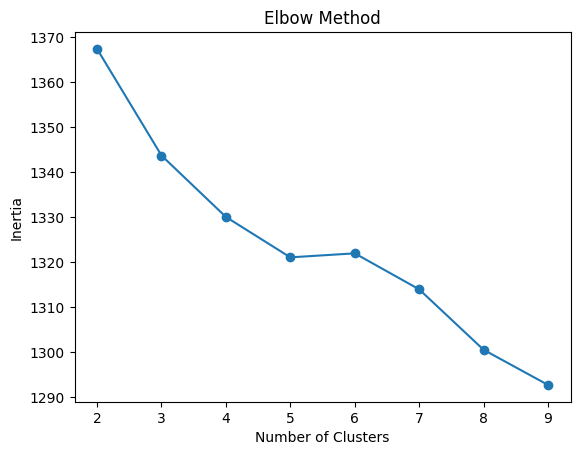

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Elbow method
inertia = []

for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

plt.plot(range(2, 10), inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [16]:
kmeans = KMeans(n_clusters=6, random_state=42)
customer_data['cluster'] = kmeans.fit_predict(X)
customer_data

,product_name,category,rating,about_product,user_name,review_id,review_content,cluster
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,4.2,High Compatibility : Compatible With iPhone 12...,"Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...",look durable charging fine toono complainschar...,2
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,4,"Compatible with all Type C enabled devices, be...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...",ordered cable connect phone android auto car c...,4
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,3.9,ã€ Fast Charger& Data Syncã€‘-With built-in s...,"Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...",quite durable sturdyhttpsmmediaamazoncomimages...,3
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,4.2,The boAt Deuce USB 300 2 in 1 cable is compati...,"Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...",good productlong wirecharges goodnicei bought ...,2
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,4.2,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...",bought instead original apple work r fast appl...,4
...,...,...,...,...,...,...,...,...
1460,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,4,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...",received product without spannerexcellent prod...,1
1461,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,4.1,"230 Volts, 400 watts, 1 Year","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...",okgot everything mentioned measuring cup broke...,3
1462,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",3.6,International design and styling|Two heat sett...,"Nehal Desai,Danish Parwez,Amazon Customer,Amaz...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...",plastic cool body u find sturdy surface put ve...,3
1463,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",4,Fan sweep area: 230 MM ; Noise level: (40 - 45...,"Shubham Dubey,E.GURUBARAN,Mayank S.,eusuf khan...","R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...",installed kitchen working fine fan speed slow ...,3


In [17]:
customer_data.groupby('cluster')['review_content'].head(5)

,review_content
0,look durable charging fine toono complainschar...
1,ordered cable connect phone android auto car c...
2,quite durable sturdyhttpsmmediaamazoncomimages...
3,good productlong wirecharges goodnicei bought ...
4,bought instead original apple work r fast appl...
5,good productlikevery good item strong useful u...
6,build quality good come year warrantygood prod...
7,worth money suitable android auto purpose serv...
8,use connect old pc internet tried lubuntu ubun...
9,ordered cable connect phone android auto car c...


In [18]:
import numpy as np

terms = tfidf.get_feature_names_out()

for i in range(6):
    print(f"\nCluster {i}:")
    centroid = kmeans.cluster_centers_[i]
    top_terms = centroid.argsort()[-10:]
    print([terms[j] for j in top_terms])


Cluster 0:
['price', 'noise', 'mic', 'headphone', 'ear', 'good', 'earphone', 'quality', 'bass', 'sound']

Cluster 1:
['work', 'one', 'like', 'price', 'mouse', 'quality', 'use', 'easy', 'product', 'good']

Cluster 2:
['type', 'usb', 'iphone', 'product', 'charge', 'good', 'fast', 'charger', 'cable', 'charging']

Cluster 3:
['heat', 'room', 'one', 'easy', 'heater', 'use', 'working', 'good', 'product', 'water']

Cluster 4:
['using', 'work', 'usb', 'data', 'product', 'quality', 'fast', 'good', 'charging', 'cable']

Cluster 5:
['picture', 'feature', 'quality', 'battery', 'remote', 'camera', 'good', 'phone', 'watch', 'tv']


In [19]:
customer_data.groupby('cluster').size()

,0
cluster,
0,97
1,469
2,143
3,375
4,129
5,252


In [20]:
cluster_names = {
    0: "Smartwatch & Features",
    1: "General Product Satisfaction",
    2: "Phone Performance & Charging",
    3: "Home Appliances & Heating",
    4: "Cable / Charger Quality",
    5: "Audio & Value for Money"
}

customer_data['cluster_name'] = customer_data['cluster'].map(cluster_names)
customer_data

,product_name,category,rating,about_product,user_name,review_id,review_content,cluster,cluster_name
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,4.2,High Compatibility : Compatible With iPhone 12...,"Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...",look durable charging fine toono complainschar...,2,Phone Performance & Charging
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,4,"Compatible with all Type C enabled devices, be...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...",ordered cable connect phone android auto car c...,4,Cable / Charger Quality
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,3.9,ã€ Fast Charger& Data Syncã€‘-With built-in s...,"Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...",quite durable sturdyhttpsmmediaamazoncomimages...,3,Home Appliances & Heating
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,4.2,The boAt Deuce USB 300 2 in 1 cable is compati...,"Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...",good productlong wirecharges goodnicei bought ...,2,Phone Performance & Charging
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,4.2,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...",bought instead original apple work r fast appl...,4,Cable / Charger Quality
...,...,...,...,...,...,...,...,...,...
1460,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,4,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...",received product without spannerexcellent prod...,1,General Product Satisfaction
1461,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,4.1,"230 Volts, 400 watts, 1 Year","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...",okgot everything mentioned measuring cup broke...,3,Home Appliances & Heating
1462,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",3.6,International design and styling|Two heat sett...,"Nehal Desai,Danish Parwez,Amazon Customer,Amaz...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...",plastic cool body u find sturdy surface put ve...,3,Home Appliances & Heating
1463,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",4,Fan sweep area: 230 MM ; Noise level: (40 - 45...,"Shubham Dubey,E.GURUBARAN,Mayank S.,eusuf khan...","R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...",installed kitchen working fine fan speed slow ...,3,Home Appliances & Heating


In [21]:
customer_data['cluster'].value_counts()

,count
cluster,
1,469
3,375
5,252
2,143
4,129
0,97


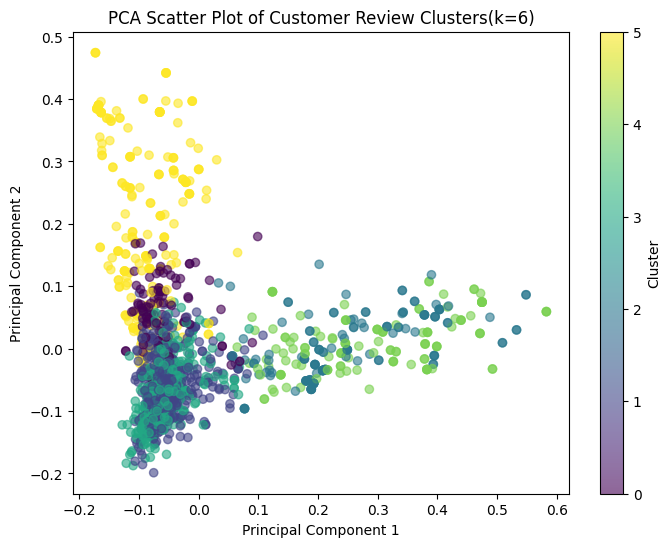

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())
plt.figure(figsize=(8,6))

scatter = plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=customer_data['cluster'],
    cmap='viridis',
    alpha=0.6
)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Scatter Plot of Customer Review Clusters(k=6)")
plt.colorbar(scatter, label='Cluster')
plt.show()

In [23]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score, davies_bouldin_score

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    stop_words='english',
    max_df=0.85,
    min_df=10,
    ngram_range=(1,2),   # BIG improvement for KMeans
    norm='l2'
)
X = vectorizer.fit_transform(customer_data['review_content'].astype(str))

In [38]:
from sklearn.cluster import KMeans

k = 6
kmeans = KMeans(
    n_clusters=k,
    random_state=42,
    n_init=20
)
kmeans_labels = kmeans.fit_predict(X)

In [39]:
from sklearn.cluster import KMeans

# X = your feature matrix (e.g., TF‑IDF or embeddings)
# shape: (n_samples, n_features)

inertias = {}
for k in range(2, 10):      # 2 to 9
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )
    kmeans.fit(X)
    inertias[k] = kmeans.inertia_   # SSE for that k

# print values to show in report
print("Elbow method values (number of clusters vs SSE):")
for k, score in inertias.items():
    print(f"k = {k} -> score = {score:.2f}")


Elbow method values (number of clusters vs SSE):
k = 2 -> score = 1363.10
k = 3 -> score = 1344.83
k = 4 -> score = 1328.41
k = 5 -> score = 1314.02
k = 6 -> score = 1306.92
k = 7 -> score = 1293.22
k = 8 -> score = 1289.75
k = 9 -> score = 1281.85


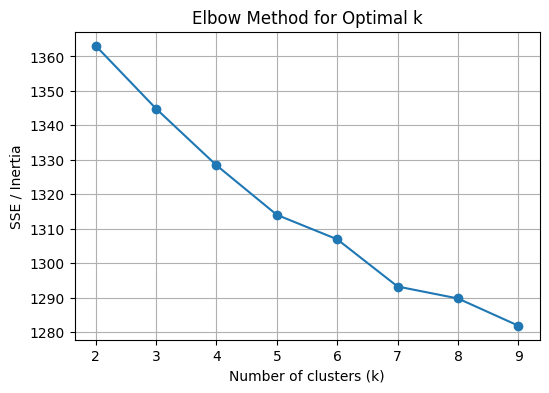

In [40]:
import matplotlib.pyplot as plt

ks = list(inertias.keys())
scores = list(inertias.values())

plt.figure(figsize=(6, 4))
plt.plot(ks, scores, marker='o')
plt.xticks(ks)
plt.xlabel("Number of clusters (k)")
plt.ylabel("SSE / Inertia")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()


In [26]:
from sklearn.cluster import AgglomerativeClustering

hier = AgglomerativeClustering(
    n_clusters=6,
    linkage='average',
    metric='cosine'
)
hier_labels = hier.fit_predict(X.toarray())

In [27]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(
    n_components=6,random_state=42,
    covariance_type='diag'
)
gmm_labels = gmm.fit_predict(X.toarray())

In [28]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
import pandas as pd
import numpy as np

def evaluate_algo(name, X, labels):
    if len(set(labels)) <= 1 or -1 in labels:
        return None
    sil = silhouette_score(X, labels, metric='cosine')
    db  = davies_bouldin_score(X.toarray(), labels)

    return [name, sil, db]

In [29]:
results = []

results.append(evaluate_algo("K-Means (k=6)", X, kmeans_labels))
results.append(evaluate_algo("Hierarchical", X, hier_labels))
results.append(evaluate_algo("GMM", X, gmm_labels))

comparison_df = pd.DataFrame(
    results,
    columns=["Algorithm", "Silhouette Score", "Davies-Bouldin Index"]
)
comparison_df

,Algorithm,Silhouette Score,Davies-Bouldin Index
0,K-Means (k=6),0.045648,5.404378
1,Hierarchical,0.005705,2.875634
2,GMM,0.042845,6.777863


In [30]:
print("Best Algorithm:", comparison_df.iloc[0]["Algorithm"])
print("Weakest Algorithm:", comparison_df.loc[
    comparison_df["Silhouette Score"].idxmin(), "Algorithm"
])

Best Algorithm: K-Means (k=6)
Weakest Algorithm: Hierarchical


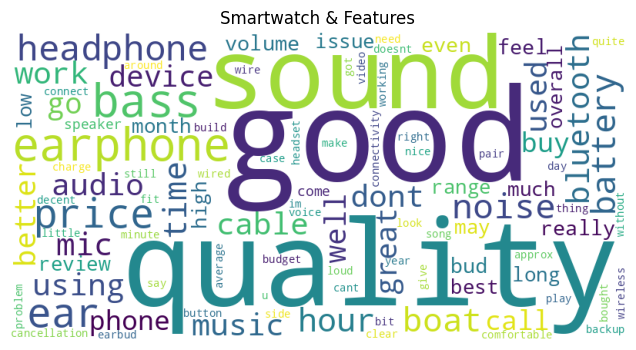

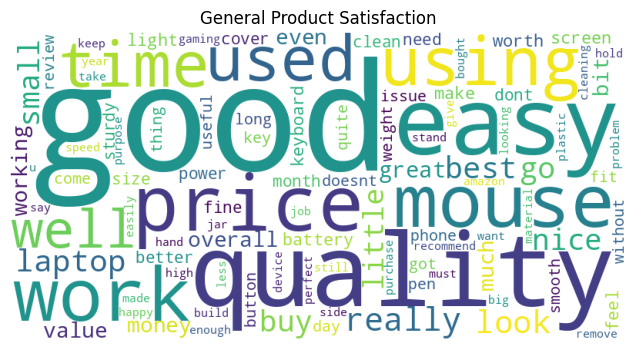

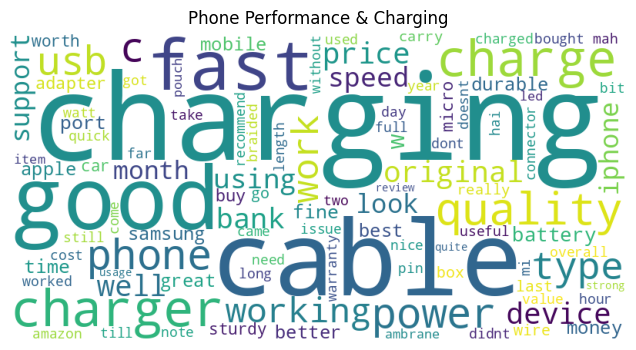

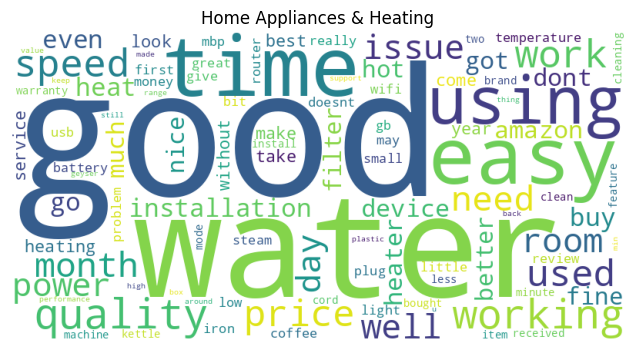

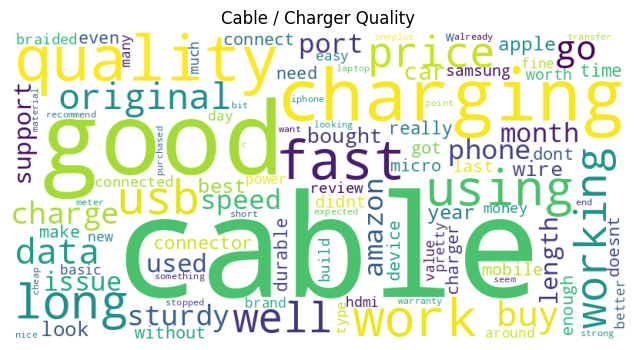

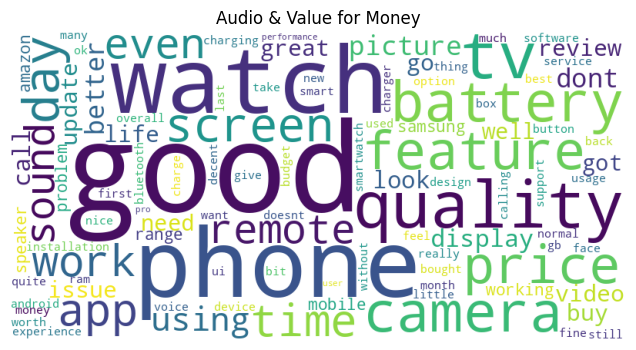

In [31]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['aa', 'one', 'use', 'product'])  # optional domain words

for i in sorted(customer_data['cluster'].unique()):
    text = " ".join(customer_data[customer_data['cluster'] == i]['review_content'])

    wc = WordCloud(
        background_color='white',
        stopwords=custom_stopwords,
        max_words=100,
        width=800,
        height=400,
        collocations=False
    ).generate(text)

    plt.figure(figsize=(8,4))
    plt.imshow(wc)
    plt.axis('off')
    plt.title(customer_data[customer_data['cluster'] == i]['cluster_name'].iloc[0])
    plt.show()

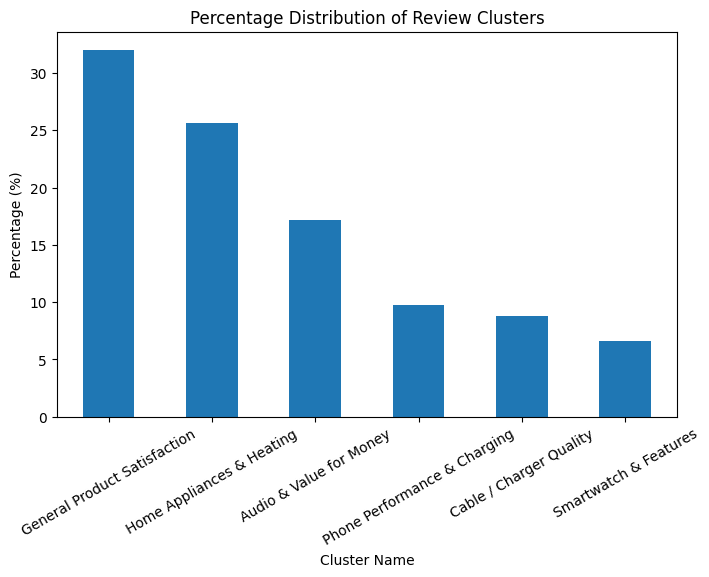

In [32]:
cluster_percent = customer_data['cluster_name'].value_counts(normalize=True) * 100

plt.figure(figsize=(8,5))
cluster_percent.plot(kind='bar')

plt.title("Percentage Distribution of Review Clusters")
plt.xlabel("Cluster Name")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=30)

plt.show()

In [33]:
customer_data['rating'].dtype

dtype('O')

In [34]:
customer_data['rating'] = pd.to_numeric(customer_data['rating'], errors='coerce')
customer_data['rating'].dtype

dtype('float64')

In [35]:
customer_data=customer_data.dropna(subset=['rating'])
customer_data

,product_name,category,rating,about_product,user_name,review_id,review_content,cluster,cluster_name
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,4.2,High Compatibility : Compatible With iPhone 12...,"Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...",look durable charging fine toono complainschar...,2,Phone Performance & Charging
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,4.0,"Compatible with all Type C enabled devices, be...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...",ordered cable connect phone android auto car c...,4,Cable / Charger Quality
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,3.9,ã€ Fast Charger& Data Syncã€‘-With built-in s...,"Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...",quite durable sturdyhttpsmmediaamazoncomimages...,3,Home Appliances & Heating
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,4.2,The boAt Deuce USB 300 2 in 1 cable is compati...,"Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...",good productlong wirecharges goodnicei bought ...,2,Phone Performance & Charging
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,4.2,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...",bought instead original apple work r fast appl...,4,Cable / Charger Quality
...,...,...,...,...,...,...,...,...,...
1460,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,4.0,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...",received product without spannerexcellent prod...,1,General Product Satisfaction
1461,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,4.1,"230 Volts, 400 watts, 1 Year","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...",okgot everything mentioned measuring cup broke...,3,Home Appliances & Heating
1462,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",3.6,International design and styling|Two heat sett...,"Nehal Desai,Danish Parwez,Amazon Customer,Amaz...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...",plastic cool body u find sturdy surface put ve...,3,Home Appliances & Heating
1463,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",4.0,Fan sweep area: 230 MM ; Noise level: (40 - 45...,"Shubham Dubey,E.GURUBARAN,Mayank S.,eusuf khan...","R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...",installed kitchen working fine fan speed slow ...,3,Home Appliances & Heating


<Figure size 1200x600 with 0 Axes>

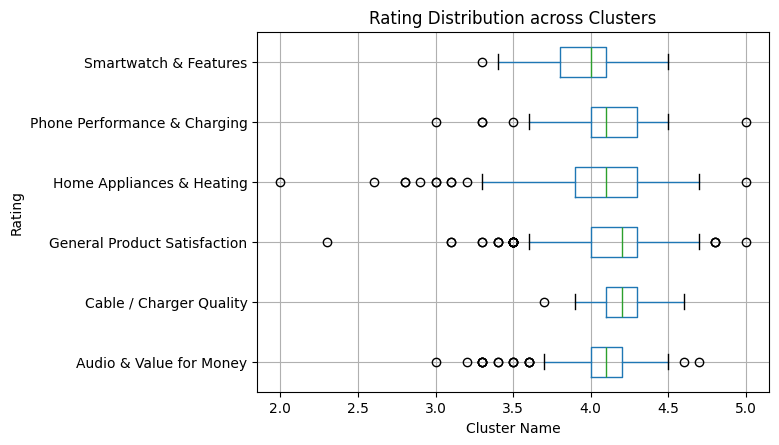

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
customer_data.boxplot(column='rating', by='cluster_name', vert=False)

plt.title("Rating Distribution across Clusters")
plt.suptitle("")
plt.xlabel("Cluster Name")
plt.ylabel("Rating")

plt.show()

In [37]:
customer_data.to_csv("customer_review_clusters.csv", index=False)